In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Asus\PycharmProjects\pythonProject20\venv\Scripts\python.exe -m pip install --upgrade pip' command.


expected number: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


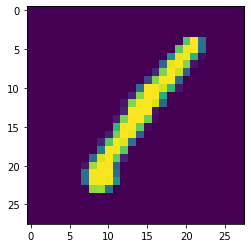

expected number: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


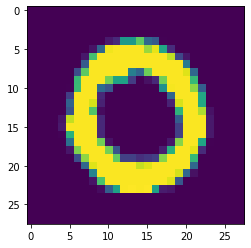

expected number: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


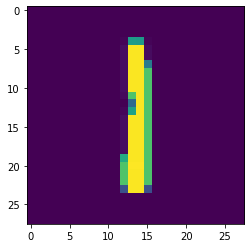

expected number: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


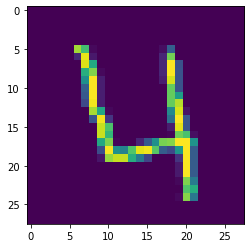

expected number: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


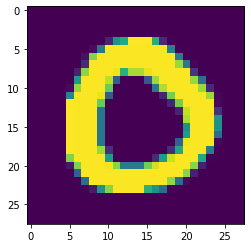

In [4]:
import matplotlib.pyplot as plt
from Datasets import DataLoader, FlattenDataSet

dataset = FlattenDataSet(df_train)

def imshow(img):
    plt.imshow(img.reshape((28, 28)))
    plt.show()


for i in range(5):
    print(f'expected number: {dataset[i][1]}')
    imshow(dataset[i][0])

In [5]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\Asus\PycharmProjects\pythonProject20\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df_train, test_size = 0.07)
train = train.reset_index()
valid = valid.reset_index()


In [7]:
from Datasets import DataLoaderMNIST

train_dataset, valid_dataset = FlattenDataSet(train), FlattenDataSet(valid)
train_loader, valid_loader = DataLoaderMNIST(train, batch_size=30), DataLoaderMNIST(valid, batch_size=10)

In [131]:
from Layers import Linear, Sequential
from Layers import SoftMax, ReLU, Sigmoid, BatchNorm, LeakyReLU, Dropout
from Optimizers import Adam

model = Sequential(
    Linear(784, 512),
    BatchNorm(),
    LeakyReLU(0.01),
    Dropout(0.1),
    Linear(512, 256),
    BatchNorm(),
    LeakyReLU(0.01),
    Dropout(0.1),
    Linear(256, 64),
    BatchNorm(),
    ReLU(),
    Linear(64, 32),
    BatchNorm(),
    ReLU(),
    #Dropout(0.1),
    Linear(32, 10),
    SoftMax()
)


In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
!pip install tqdm

You should consider upgrading via the 'C:\Users\Asus\PycharmProjects\pythonProject20\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [134]:
def accuracy(model):
    valid_acc = 0
    valid_steps = 0
    model.eval()
    for i in range(len(valid_loader)):
        batch = valid_loader[i]
        output = model.forward(batch[0])
        predict = output.argmax(1)
        valid_acc += accuracy_score(predict, batch[1].argmax(1))
        valid_steps += 1
    return valid_acc / valid_steps

In [135]:
from tqdm.auto import tqdm
from Criterion import CrossEntropyLoss, MSELoss
from Optimizers import SGDOptimizer
from sklearn.metrics import accuracy_score
optimizer = Adam(model, lr = 0.01)
criterion = CrossEntropyLoss()
n_epochs = 12

xs = [0]
ys = [0]

for epoch in tqdm(range(n_epochs)):
    sum_loss = 0
    cnt_steps = 0
    model.train()
    #pbar = tqdm(train_loader, total = len(train_loader))
    for i in range(len(train_loader)):
        batch = train_loader[i]
        output = model.forward(batch[0])
        loss = criterion.loss(output, batch[1])
        sum_loss += loss
        cnt_steps += 1
        xs.append(xs[-1])
        ys.append(loss)
        gradient = criterion.backward()
        gradient = np.minimum(gradient, 0.5)
        model.backward(batch[0], gradient)
        optimizer.step()
    print(f'Mean loss for epoch {epoch}: {sum_loss / cnt_steps} | Test accuracy : {accuracy(model)}')

  0%|          | 0/12 [00:00<?, ?it/s]

Mean loss for epoch 0: 0.3615070784596897 | Test accuracy : 0.9396610169491529
Mean loss for epoch 1: 0.15275080759541898 | Test accuracy : 0.9522033898305096
Mean loss for epoch 2: 0.11597665606397137 | Test accuracy : 0.9555932203389841
Mean loss for epoch 3: 0.09164742984641974 | Test accuracy : 0.9532203389830518
Mean loss for epoch 4: 0.07747422495547046 | Test accuracy : 0.9606779661016952
Mean loss for epoch 5: 0.06648419286000454 | Test accuracy : 0.9667796610169499
Mean loss for epoch 6: 0.05675275874666178 | Test accuracy : 0.9650847457627126
Mean loss for epoch 7: 0.05325275341574277 | Test accuracy : 0.9667796610169497
Mean loss for epoch 8: 0.04424521250015415 | Test accuracy : 0.9711864406779667


KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss on train')

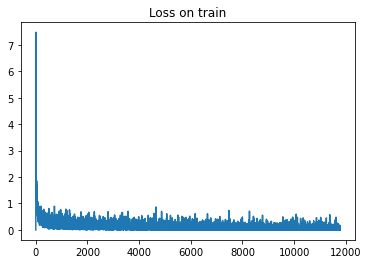

In [136]:
plt.plot(np.arange(len(ys)), ys)
plt.title("Loss on train")

In [137]:
accuracy(model)

0.9705084745762714